## Análise de Regressão

- Descarregue os dados Estudantes.csv usando o link https://www.dropbox.com/scl/fi/
c84nw3do7fk98vc36qb3e/Estudantes.csv?rlkey=z89gphri2gfvfuubjxr3vokgw&dl=0.
- Estes dados são os resultados de um estudo feito a estudantes de duas escolas de ensino médio. As variáveis dos dados são:
    - 1. Tipo: Tipo de escola. 1 Pública e 2 Privada.
    - 2. Idade: Idade do estudante em anos.
    - 3. TempoE. Tempo de estudo semanal, em horas, fora de aula.
    - 4. Hsono: Número médio de horas que dorme por noite.
    - 5. Alcool: Número médio de vezes que tem contato com álcool, por mês.
    - 6. Depor: Número médio de horas dedicadas a alguma atividade esportiva, por semana.
    - 7. Nota: Nóta média obtida no ano de todas as disciplinas.
    Fonte dos dados: Center for Machine Learning and Intelligent Systems.
        - http://cml.ics.uci.edu/


### 0. Dependências

In [144]:
import numpy as np
import pandas as pd
from scipy import stats as st
import statsmodels as stm
import statsmodels.api as sm

import seaborn as sb
from matplotlib import pyplot as plt
import pylab

### 0.1 Vamos trabalhar os dados?

In [145]:
dados = pd.read_csv('estudantes.csv', sep=';', decimal='.')

In [146]:
dados.head()

,Tipo,Idade,TempoE,Hsono,Alcool,Depor,Nota
0,1,17,1,4,2,0,"2,1"
1,1,16,1,5,1,2,"2,3"
2,1,17,2,5,1,0,"2,3"
3,1,18,2,5,1,2,"2,3"
4,1,16,2,7,3,1,"2,4"


### 0.2 Vamos realizar uma EDA nos dados:

- Quais as dimensões dos dados?
    - 395 linhas;
    - 7 colunas;

In [147]:
dados.shape

(395, 7)

- Temos dados nulos?
    - Aparentemente não temos dados nulos;

In [148]:
dados.isnull().sum()

Tipo      0
Idade     0
TempoE    0
Hsono     0
Alcool    0
Depor     0
Nota      0
dtype: int64

- Como os dados variam? 
    - Tipo de fato tem duas categorias;
    - Concentrando os dados mais em escolas privadas do que em escolas públicas;

In [149]:
dados.Tipo = dados.Tipo.apply(lambda e: 'publica' if e==1 else 'privada')

In [150]:
dados.Tipo.value_counts(dropna=False).sort_index()

Tipo
privada    307
publica     88
Name: count, dtype: int64

In [151]:
(dados.Tipo.value_counts(dropna=False, normalize=True)*100).sort_index()

Tipo
privada    77.721519
publica    22.278481
Name: proportion, dtype: float64

- Como os dados variam? 
    - Idade;
    - Mais de 90% das idades estão abaixo de 20 anos;

In [152]:
dados.Idade.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: Idade, dtype: float64

In [153]:
dados.Idade.value_counts(dropna=False).sort_index()

Idade
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: count, dtype: int64

In [154]:
(dados.Idade.value_counts(dropna=False, normalize=True)*100).sort_index()

Idade
15    20.759494
16    26.329114
17    24.810127
18    20.759494
19     6.075949
20     0.759494
21     0.253165
22     0.253165
Name: proportion, dtype: float64

- Como os dados variam? 
    - Tempo de Estudo Semanal;

In [155]:
dados.TempoE.describe()

count    395.000000
mean       4.379747
std        3.677700
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       19.000000
Name: TempoE, dtype: float64

In [156]:
dados.TempoE.value_counts(dropna=False).sort_index()

TempoE
1     45
2     94
3     74
4     62
5     37
6     16
7     12
8     10
9     11
10     8
11     2
12     2
13     2
14     5
16     4
17     4
18     4
19     3
Name: count, dtype: int64

In [157]:
(dados.TempoE.value_counts(dropna=False, normalize=True)*100).sort_index()

TempoE
1     11.392405
2     23.797468
3     18.734177
4     15.696203
5      9.367089
6      4.050633
7      3.037975
8      2.531646
9      2.784810
10     2.025316
11     0.506329
12     0.506329
13     0.506329
14     1.265823
16     1.012658
17     1.012658
18     1.012658
19     0.759494
Name: proportion, dtype: float64

- Como os dados variam? 
    - Hora de sono;

In [158]:
dados.Hsono.describe()

count    395.000000
mean       6.587342
std        1.615075
min        4.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Hsono, dtype: float64

In [159]:
dados.Hsono.value_counts(dropna=False).sort_index()

Hsono
4      49
5      67
6      65
7      81
8     102
9      12
10     19
Name: count, dtype: int64

In [160]:
(dados.Hsono.value_counts(dropna=False, normalize=True)*100).sort_index()

Hsono
4     12.405063
5     16.962025
6     16.455696
7     20.506329
8     25.822785
9      3.037975
10     4.810127
Name: proportion, dtype: float64

- Como os dados variam? 
    - Consumo de álcool;

In [161]:
dados.Alcool.describe()

count    395.000000
mean       1.756962
std        0.946096
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Alcool, dtype: float64

In [162]:
dados.Alcool.value_counts(dropna=False).sort_index()

Alcool
0     38
1    122
2    133
3    102
Name: count, dtype: int64

In [163]:
(dados.Alcool.value_counts(dropna=False, normalize=True)*100).sort_index()

Alcool
0     9.620253
1    30.886076
2    33.670886
3    25.822785
Name: proportion, dtype: float64

- Como os dados variam? 
    - Horas em atividades esportivas;

In [164]:
dados.Depor.describe()

count    395.000000
mean       2.063291
std        1.605367
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Depor, dtype: float64

In [165]:
dados.Depor.value_counts(dropna=False).sort_index()

Depor
0     80
1     74
2    117
3     36
4     41
5     47
Name: count, dtype: int64

In [166]:
(dados.Depor.value_counts(dropna=False, normalize=True)*100).sort_index()

Depor
0    20.253165
1    18.734177
2    29.620253
3     9.113924
4    10.379747
5    11.898734
Name: proportion, dtype: float64

- Como os dados variam? 
    - A variável resposta, Nota;

In [167]:
dados.Nota = dados.Nota.apply(lambda e: str(e).replace(',','.')).astype(float)

In [168]:
dados.Nota.describe()

count    395.000000
mean       5.017215
std        1.632353
min        2.000000
25%        3.700000
50%        4.900000
75%        6.200000
max        9.900000
Name: Nota, dtype: float64

In [169]:
dados.Nota.value_counts(dropna=False).sort_index()

Nota
2.0    2
2.1    1
2.2    1
2.3    7
2.4    8
      ..
8.7    2
8.8    1
8.9    4
9.5    2
9.9    1
Name: count, Length: 68, dtype: int64

In [170]:
(dados.Nota.value_counts(dropna=False, normalize=True)*100).sort_index()

Nota
2.0    0.506329
2.1    0.253165
2.2    0.253165
2.3    1.772152
2.4    2.025316
         ...   
8.7    0.506329
8.8    0.253165
8.9    1.012658
9.5    0.506329
9.9    0.253165
Name: proportion, Length: 68, dtype: float64

- Vamos entender a dispersão dos dados em gráficos:

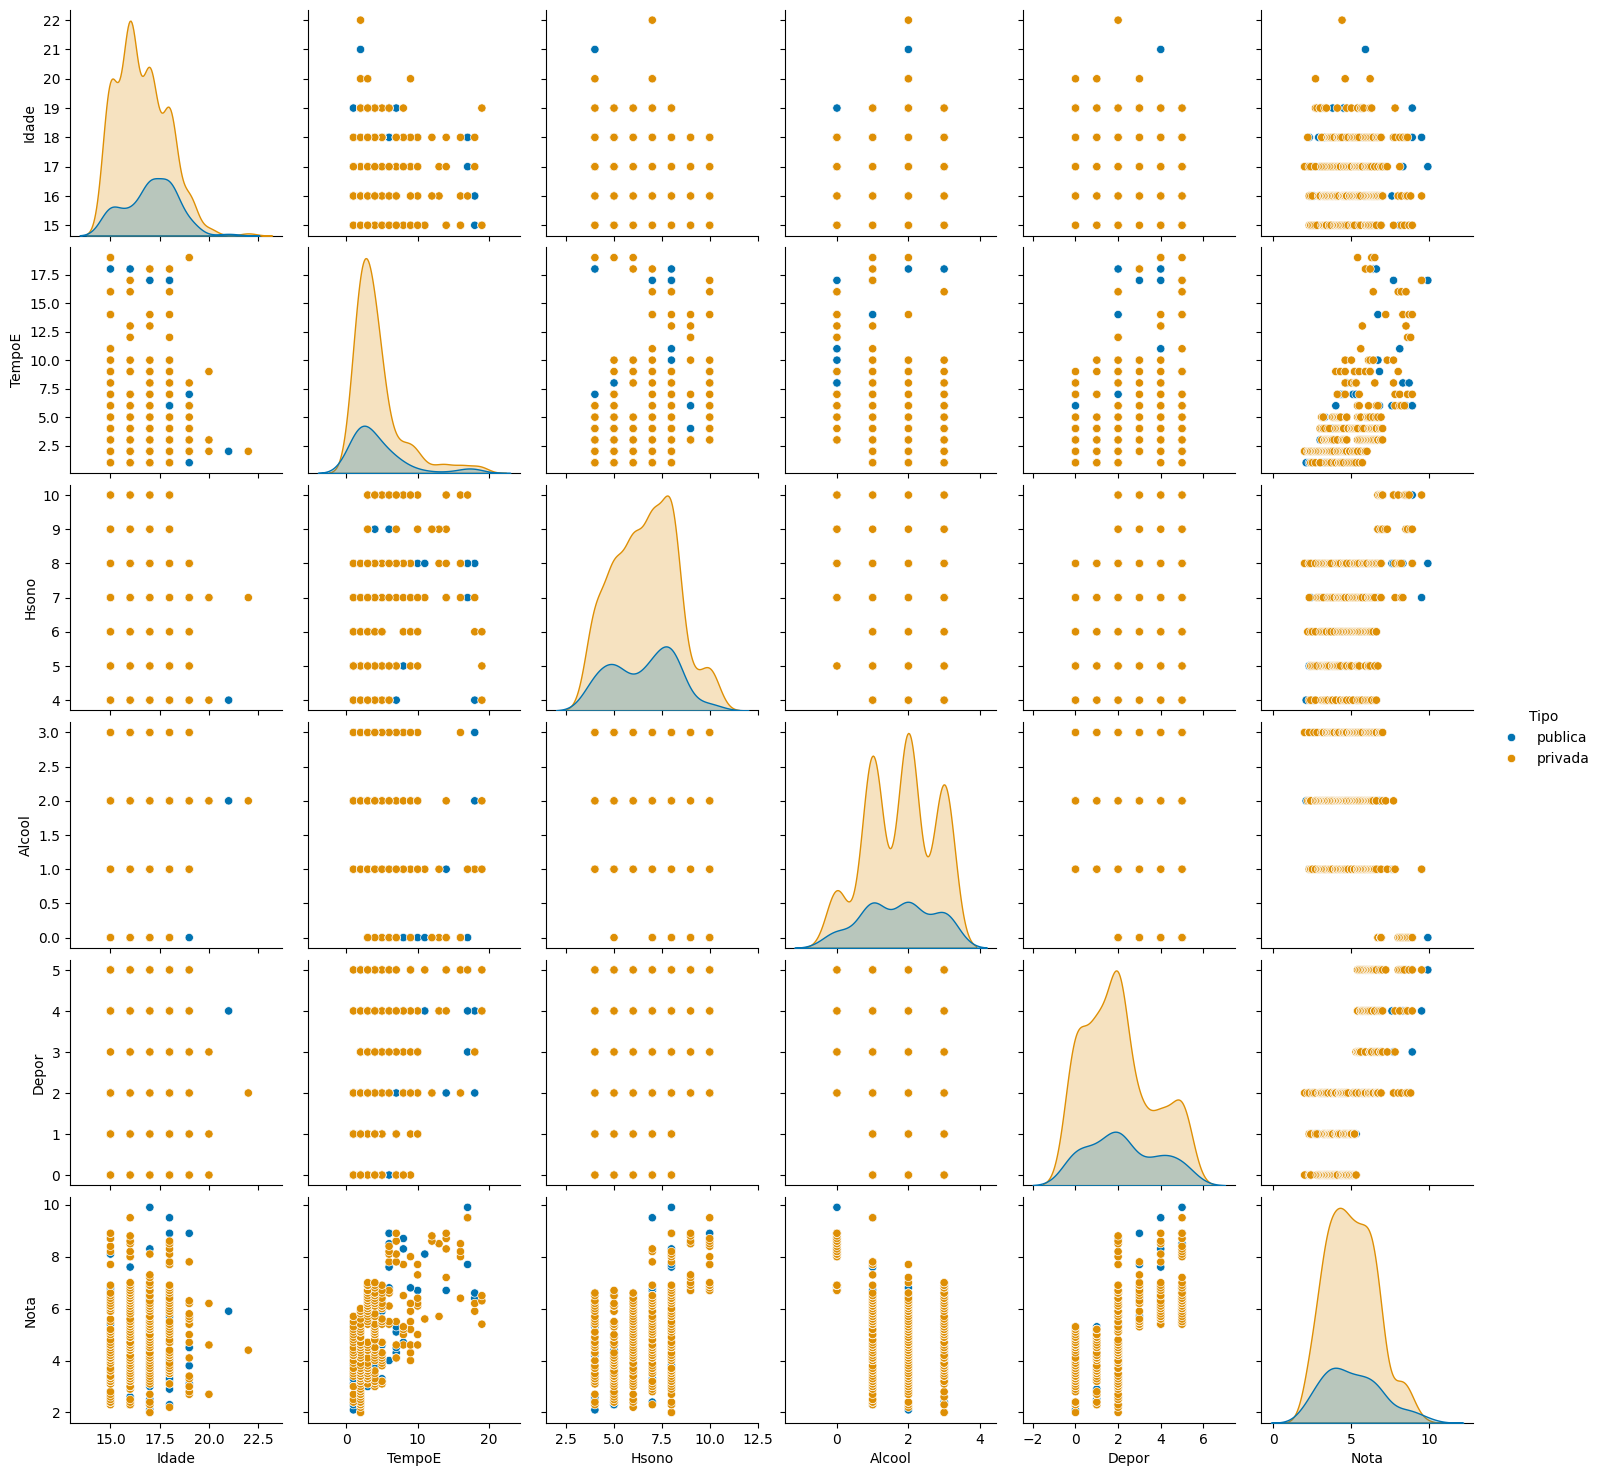

In [171]:
sb.pairplot(data=dados, hue='Tipo', corner=False, palette='colorblind')

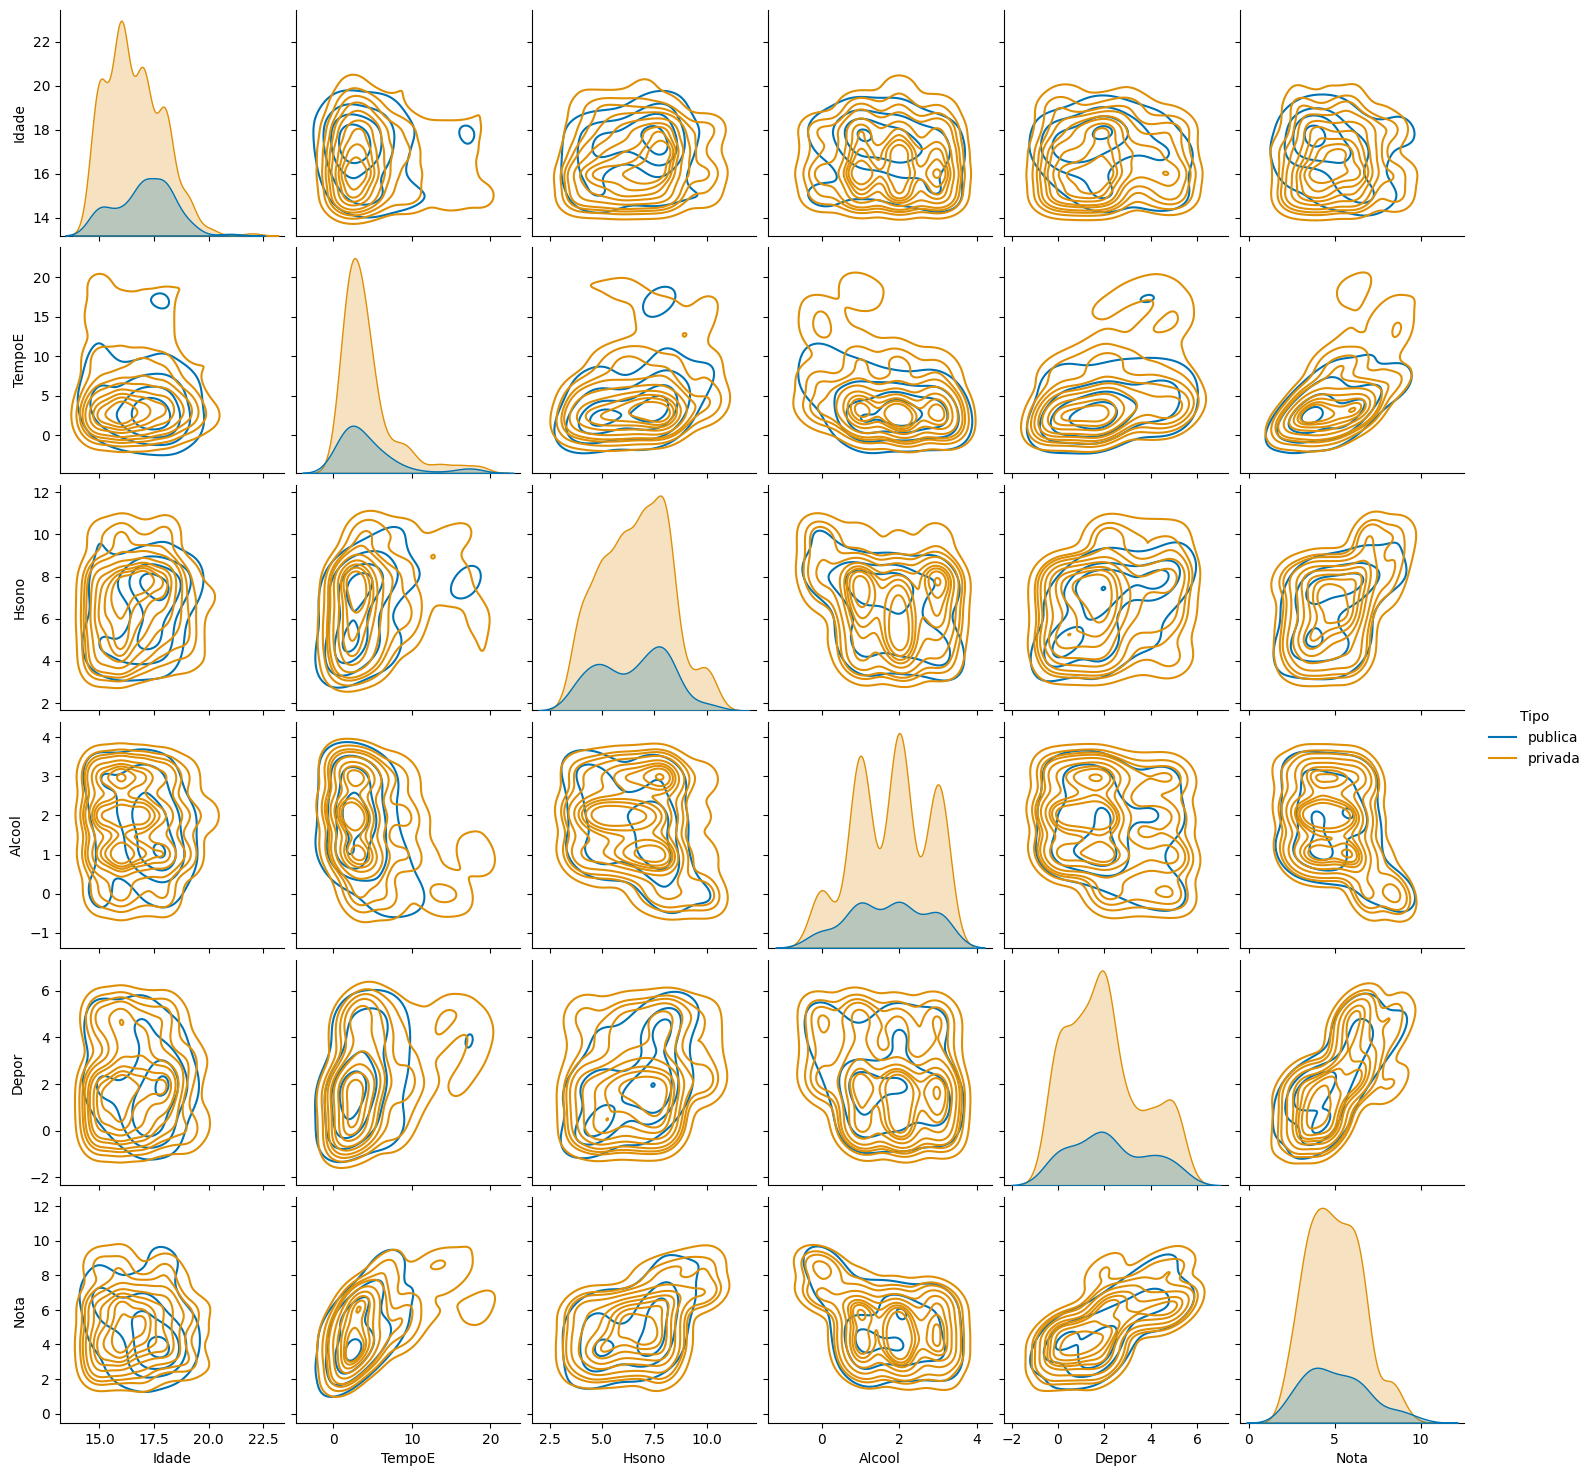

In [172]:
sb.pairplot(data=dados, hue='Tipo', corner=False, palette='colorblind', kind='kde')

- Como está a correlação das variáveis com a Nota?
    - Tipo de escola não parece ter correlação com a Nota;
    - Idade não ajuda e tem relação com a Nota;
    - Tempo de estudo, Hsono, Depor possuem correlçao positiva considerável;
    - Consumo de alcool tem correlação negativa;

<Axes: >

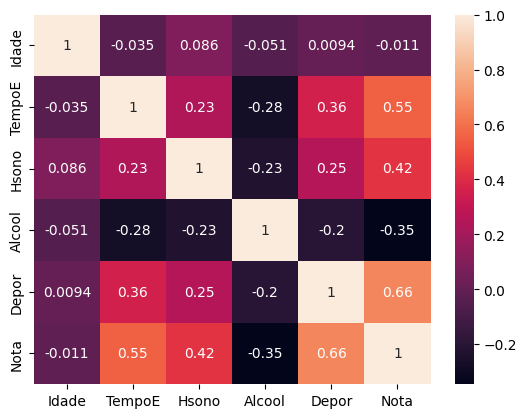

In [178]:
sb.heatmap(dados.iloc[:,1:].corr(), annot=True)

### 1. Que tipo de variáveis temos nos dados?

In [179]:
dados.dtypes

Tipo       object
Idade       int64
TempoE      int64
Hsono       int64
Alcool      int64
Depor       int64
Nota      float64
dtype: object

- Tipo        é do tipo Categórico
- Idade       é do tipo Inteiro
- TempoE      é do tipo Inteiro
- Hsono       é do tipo Inteiro
- Alcool      é do tipo Inteiro
- Depor       é do tipo Inteiro
- Nota      é do tipo Numérico

### 2. Como utilizaria a variável tipo de escola dentro da análise destes dados?

- Poderíamos realizar a dummização da variável, da seguinte forma:

In [180]:
dados.head()

,Tipo,Idade,TempoE,Hsono,Alcool,Depor,Nota
0,publica,17,1,4,2,0,2.1
1,publica,16,1,5,1,2,2.3
2,publica,17,2,5,1,0,2.3
3,publica,18,2,5,1,2,2.3
4,publica,16,2,7,3,1,2.4


In [181]:
tipo_dummy = pd.get_dummies(dados.Tipo, prefix='tipo', dtype=float)

tipo_dummy

,tipo_privada,tipo_publica
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
390,1.0,0.0
391,1.0,0.0
392,1.0,0.0
393,1.0,0.0


In [182]:
dados = dados.drop(columns=['Tipo'])
dados = pd.concat([tipo_dummy, dados], axis=1)

dados.head()

,tipo_privada,tipo_publica,Idade,TempoE,Hsono,Alcool,Depor,Nota
0,0.0,1.0,17,1,4,2,0,2.1
1,0.0,1.0,16,1,5,1,2,2.3
2,0.0,1.0,17,2,5,1,0,2.3
3,0.0,1.0,18,2,5,1,2,2.3
4,0.0,1.0,16,2,7,3,1,2.4


In [183]:
# convertendo tudo para numérico
dados = dados.astype(float)
dados.head()

,tipo_privada,tipo_publica,Idade,TempoE,Hsono,Alcool,Depor,Nota
0,0.0,1.0,17.0,1.0,4.0,2.0,0.0,2.1
1,0.0,1.0,16.0,1.0,5.0,1.0,2.0,2.3
2,0.0,1.0,17.0,2.0,5.0,1.0,0.0,2.3
3,0.0,1.0,18.0,2.0,5.0,1.0,2.0,2.3
4,0.0,1.0,16.0,2.0,7.0,3.0,1.0,2.4


### 3. Apresente uma equação para um modelo de regressão linear cuja variável resposta seja a Nota média (tenha em conta que o modelo de regressão é para variáveis numéricas).

- Vamos aplicar padronização standartscaler de dados:
    - Para cada uma das colunas, vamos aplicar a transformação: $$Z_{coluna} = \frac{X_i-\mu_X}{\sigma}$$

# Não vamos executar as linhas abaixo, não há necessidade. Só se quisermos padronizar os dados
dados.head()

for coluna in dados.columns.tolist():
    dados[coluna] = dados[coluna].apply(lambda x: (x-dados[coluna].mean())/dados[coluna].std(ddof=1))
    
# Os dados abaixo estão com a padronização Z aplicada
dados.head()

In [184]:
X = dados.iloc[:,:-1].values
X = sm.add_constant(X)
y = dados.Nota.values

In [185]:
RegModel = sm.OLS(y, X, hasconst=True)

In [186]:
RegModelAjustado = RegModel.fit()

- Vetor de betas:

In [187]:
RegModelAjustado.params 

array([ 2.00219383,  1.00939764,  0.99279619, -0.03535726,  0.13257746,
        0.20909863, -0.20709827,  0.48730796])

- Coeficientes:
    - Constante: $B_0=2.00219383$
    - tipo_privada: $B_1=1.00939764$
    - tipo_publica: $B_2=0.99279619$
    - Idade: $B_3=-0.03535726$
    - TempoE: $B_4=0.13257746$
    - Hsono: $B_5=0.20909863$
    - Alcool: $B_6=-0.20709827$
    - Depor: $B_7=0.48730796$

$$\hat{Y} = b_0 + b_1X_{privada} + b_2X_{publica} + b_3X_{idade} + b_4X_{tempoE} + b_5X_{hsono} + b_6X_{alcool} + b_7X_{depor}$$

$$\hat{Y} = 2.00219383 + 1.00939764X_{privada} + 0.99279619X_{publica} - 0.03535726X_{idade} + 0.13257746X_{tempoE} + 0.20909863X_{hsono} - 0.20709827X_{alcool} + 0.48730796X_{depor}$$

### 4. Apresente testes de hipóteses sobre o modelo e suas conclusões

- Testando a hipótese de $H_0: B_i=0$ ou $H_1: B_i\neq0$ para qualquer $i$ nas variáveis:
    - F=1437.0446059746448
    - p=5.167295913444707e-273
    - Rejeitamos $H_0$.

In [188]:
RegModelAjustado.f_test(np.identity(8))

c:\Users\vierb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1437.0446059746448, p=5.167295913444707e-273, df_denom=388, df_num=7>

- Quais os intervalos de coenfiança para cada um dos coeficientes?
    - O coeficiente $B_0 ou C_0$ está com baixo desvio e intervalo que não passa por 0, é significativo;
    - O coeficiente tipo_privada $B_1 ou C_1$ está com alto desvio e intervalo que não passa por 0, é significativo;
    - O coeficiente tipo_publica $B_2 ou C_2$ está com alto desvio e intervalo que não passa por 0, é significativo;
    - O coeficiente Idade $B_3 ou C_3$ está com alto desvio e intervalo que passa por 0, não é significativo;
    - O coeficiente TempoE $B_4 ou C_4$ está com baixo desvio e intervalo que não passa por 0, é significativo;
    - O coeficiente Hsono $B_5 ou C_5$ está com baixo desvio e intervalo que não passa por 0, é significativo;
    - O coeficiente Alcool $B_6 ou C_6$ está com baixo desvio e intervalo que não passa por 0, é significativo;
    - O coeficiente Depor $B_7 ou C_7$ está com baixo desvio e intervalo que não passa por 0, é significativo;

In [189]:
RegModelAjustado.t_test(np.identity(8))

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.0022      0.489      4.096      0.000       1.041       2.963
c1             1.0094      0.242      4.178      0.000       0.534       1.484
c2             0.9928      0.263      3.779      0.000       0.476       1.509
c3            -0.0354      0.041     -0.858      0.392      -0.116       0.046
c4             0.1326      0.016      8.513      0.000       0.102       0.163
c5             0.2091      0.034      6.133      0.000       0.142       0.276
c6            -0.2071      0.058     -3.568      0.000      -0.321      -0.093
c7             0.4873      0.035     13.828      0.000       0.418       0.557

- Abaixo temos um sumário de todos os testes estatísticos:

In [190]:
print(RegModelAjustado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     101.6
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.91e-76
Time:                        21:39:55   Log-Likelihood:                -567.00
No. Observations:                 395   AIC:                             1148.
Df Residuals:                     388   BIC:                             1176.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0022      0.489      4.096      0.0

### 5. Verique todos os supostos do modelo. O que pode concluir?


- Vamos encontrar os resíduos do modelo:

In [191]:
dados_residuos = pd.DataFrame({'nota_real':y,'nota_pred':RegModelAjustado.predict(X)})
dados_residuos['residuo'] = dados_residuos['nota_pred'] - dados_residuos['nota_real']
dados_residuos.head()

,nota_real,nota_pred,residuo
0,2.1,2.948692,0.848692
1,2.3,4.374862,2.074862
2,2.3,3.497466,1.197466
3,2.3,4.436725,2.136725
4,2.4,4.024132,1.624132


In [192]:
dados_residuos = dados_residuos.reset_index()

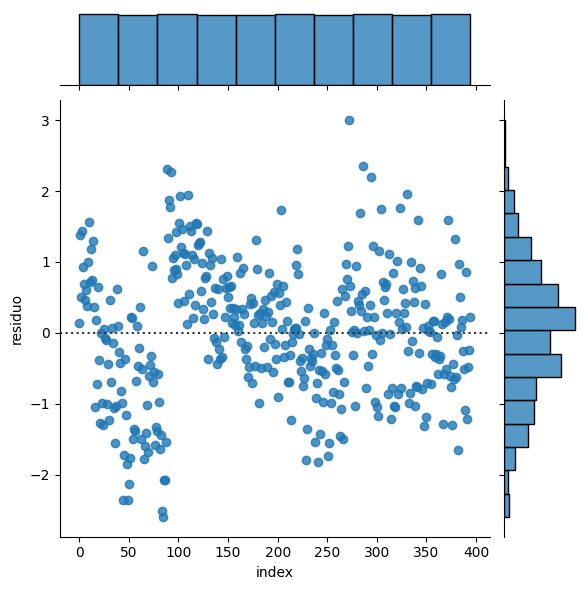

In [193]:
sb.jointplot(data=dados_residuos, x='index', y='residuo', kind='resid')

- Normalidade dos resíduos:

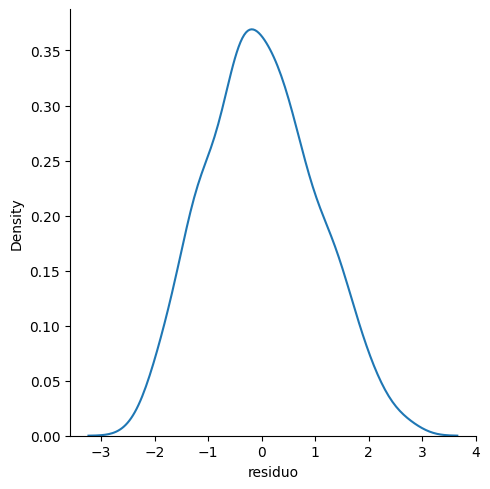

In [194]:
sb.displot(data=dados_residuos.residuo, kind='kde')

- Vamos testar com 3 testes de hipótese:
    - Shapiro Wilk Test concluímos que é normal;
    - Anderson Darling Test concluímos que é normal;
    - Test KS concluímos que é normal;
    - QQ-Plot concluímos que é normal;

In [195]:
stats.shapiro(dados_residuos.residuo)

ShapiroResult(statistic=0.9915830930382877, pvalue=0.024327503413453192)

In [196]:
stats.anderson(dados_residuos.residuo, dist='norm')

AndersonResult(statistic=0.6466363997205917, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.4104487744773017e-15, scale=1.017941425145884)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [197]:
stats.kstest(dados_residuos.residuo, stats.norm.cdf)

KstestResult(statistic=0.03959839767204287, pvalue=0.551925591298686, statistic_location=-0.3506292685346484, statistic_sign=1)

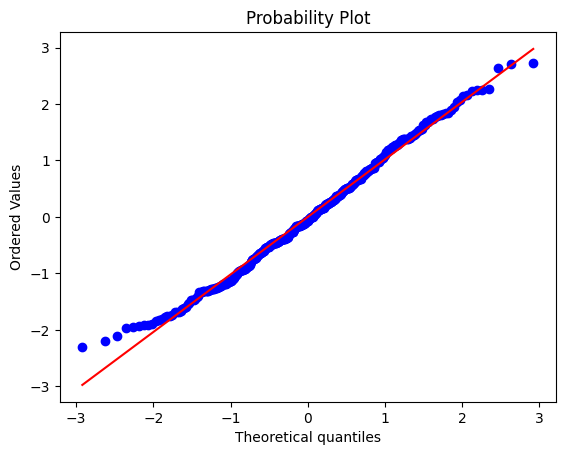

In [198]:
stats.probplot(dados_residuos.residuo, dist="norm", plot=pylab)
pylab.show()

- Vamos usar teste de Bartlett e Levene:
    - Parece que temos homogeneidade nos resíduos;

In [199]:
res = stats.bartlett(dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False))
res

BartlettResult(statistic=0.08271189947582135, pvalue=0.95948753981862)

In [201]:
res = stats.levene(dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False), dados_residuos.residuo.sample(frac=0.5,replace=False))
res

LeveneResult(statistic=0.046759779286214144, pvalue=0.9543201469219689)

- Abaixo vemos que no segundo sumário do modelo:
    - Durbin-Watson:	0.932
    - Parece existir uma autocorrelação positiva;

In [202]:
RegModelAjustado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: y                AIC:                1148.0083
Date:               2024-08-06 21:41 BIC:                1175.8605
No. Observations:   395              Log-Likelihood:     -567.00  
Df Model:           6                F-statistic:        101.6    
Df Residuals:       388              Prob (F-statistic): 1.91e-76 
R-squared:          0.611            Scale:              1.0522   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const       2.0022     0.4888    4.0958   0.0001    1.0411    2.9633
x1          1.0094     0.2416    4.1784   0.0000    0.5344    1.4844
x2          0.9928     0.2627    3.7787   0.0002    0.4762    1.5094
x3         -0.0354     0.0412   -0.8577   0.3916   -0.1164    0.0457
x4          0.1326     0.0156    8.5130   0.0000    0.1020    0.1632
x5          0.2091     0.0341    6.1325   0.0000    0.1421    0.2761
x6         -0.2071     0.0580   -3.5676   0.0004   -0.3212   -0.0930
x7          0.4873     0.0352   13.8277   0.0000    0.4180    0.5566
------------------------------------------------------------------
Omnibus:          7.785     Durbin-Watson:       0.932            
Prob(Omnibus):    0.020     Jarque-Bera (JB):    5.903            
Skew:             -0.190    Prob(JB):            0.052            
Kurtosis:         2.537     Condition No.:       36258730713761800
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-28. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""

### 6. Apresente o código usado

- Código disponível no Jupyter notebook;

----------